<a href="https://colab.research.google.com/github/Abde-Ali/Banking-Domain-Case-Study/blob/main/Credit_Prediction_Score_(Standard_Scalar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import set_config

#### uploading of DataSet
###### which is in my Github page of same the repository

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearning Projects/credit_risk_dataset.csv")

### Understanding Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [6]:
#Filling Missing Values with their respective mode
df['loan_int_rate'].fillna(value=7.51,inplace=True)
df['person_emp_length'].fillna(value=0.0, inplace=True)

In [7]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## TRAINING AND MOULDING DATA

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['loan_status'],axis = 1),df['loan_status'],test_size=0.25,stratify=df['loan_status'])

In [9]:
oe = OneHotEncoder(drop = 'first',sparse= False)
sc = StandardScaler()

In [10]:
x_train_num = pd.DataFrame(sc.fit_transform(x_train.select_dtypes(include=['float','int'])),index = x_train.index , columns = x_train.select_dtypes(include=['float','int']).columns)
x_train_cat = pd.DataFrame(oe.fit_transform(x_train.select_dtypes(include=['object'])),index=x_train.index, columns= oe.get_feature_names_out())
x_train_proc = pd.merge(x_train_num, x_train_cat, left_index=True, right_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
x_test_num = pd.DataFrame(sc.fit_transform(x_test.select_dtypes(include=['float','int'])),index = x_test.index , columns = x_test.select_dtypes(include=['float','int']).columns)
x_test_cat = pd.DataFrame(oe.fit_transform(x_test.select_dtypes(include=['object'])),index=x_test.index, columns= oe.get_feature_names_out())
x_test_proc = pd.merge(x_test_num, x_test_cat, left_index=True, right_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Modelling

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [13]:
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
gn = GaussianNB()
lr = LogisticRegression()
kn = KNeighborsClassifier()
mn = MultinomialNB()

In [14]:
def get_metrics(real, pred):
    print("Accuracy Score :",np.around(accuracy_score(real, pred),2))
    print("Precision Score :",np.around(precision_score(real, pred),2))
    print("Recall Score :", np.around(recall_score(real, pred),2))
    print("F1 Score :", np.around(f1_score(real, pred),2))
    print("Confusion Matrix :")
    sns.heatmap(pd.crosstab(index=real, columns=pred, rownames=['Real'],colnames=['Predicted']), annot=True, fmt='.0f')
    plt.show()

In [15]:
lr.fit(x_train_proc,y_train)


LogisticRegression()

Accuracy Score : 0.87
Precision Score : 0.78
Recall Score : 0.57
F1 Score : 0.66
Confusion Matrix :


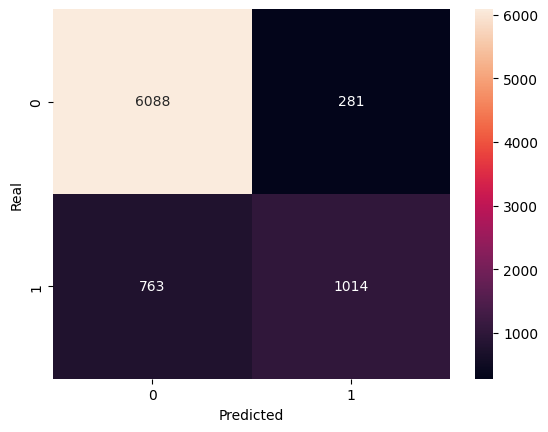

In [16]:
get_metrics(y_test, lr.predict(x_test_proc))

Accuracy Score : 0.87
Precision Score : 0.71
Recall Score : 0.7
F1 Score : 0.7
Confusion Matrix :


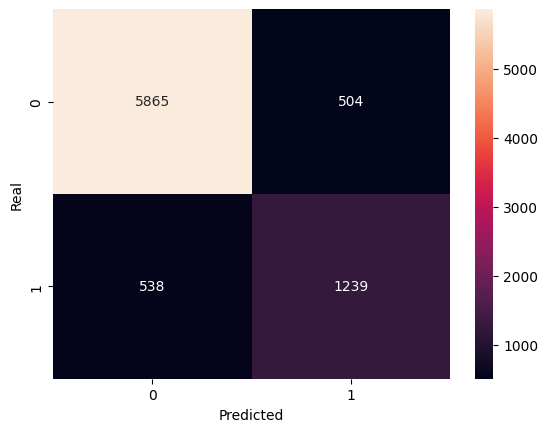

In [17]:
dt.fit(x_train_proc,y_train)
get_metrics(y_test, dt.predict(x_test_proc))

Accuracy Score : 0.92
Precision Score : 0.97
Recall Score : 0.66
F1 Score : 0.79
Confusion Matrix :


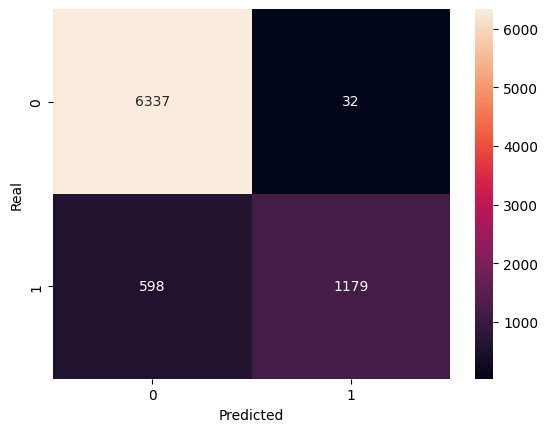

In [18]:
rfc.fit(x_train_proc,y_train)
get_metrics(y_test, rfc.predict(x_test_proc))

Accuracy Score : 0.89
Precision Score : 0.84
Recall Score : 0.62
F1 Score : 0.71
Confusion Matrix :


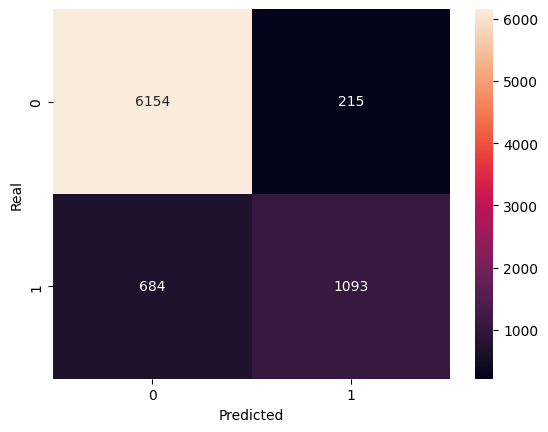

In [19]:
kn.fit(x_train_proc,y_train)
get_metrics(y_test, kn.predict(x_test_proc))

Accuracy Score : 0.84
Precision Score : 0.69
Recall Score : 0.46
F1 Score : 0.55
Confusion Matrix :


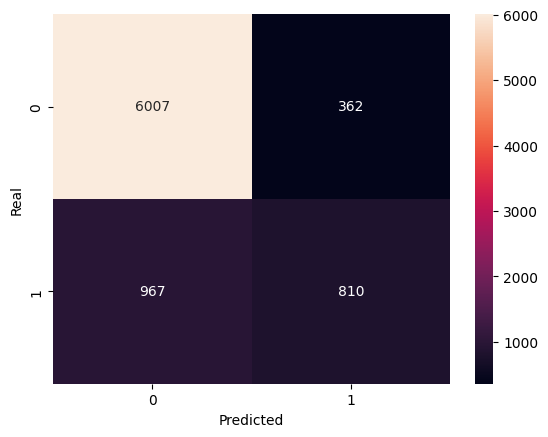

In [20]:
gn.fit(x_train_proc,y_train)
get_metrics(y_test, gn.predict(x_test_proc))

Accuracy Score : 0.91
Precision Score : 0.94
Recall Score : 0.64
F1 Score : 0.76
Confusion Matrix :


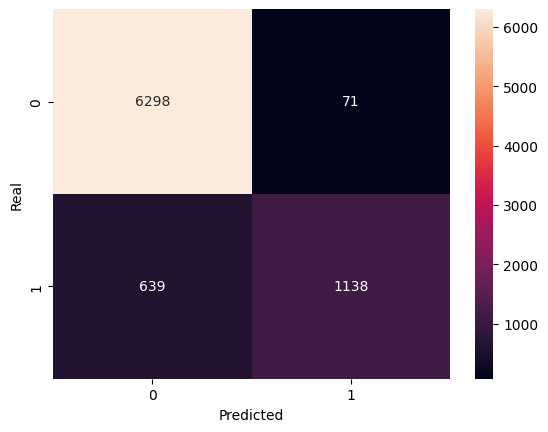

In [21]:
svc.fit(x_train_proc,y_train)
get_metrics(y_test, svc.predict(x_test_proc))